# Dask Array (2)

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Dask"
* https://docs.dask.org/en/latest/array.html
* https://gregorygundersen.com/blog/2018/12/10/svd/
* https://en.wikipedia.org/wiki/Cosine_similarity
* https://en.wikipedia.org/wiki/Adjacency_matrix
* https://en.wikipedia.org/wiki/Pairing_function#Cantor_pairing_function
* https://image.dask.org/en/latest/
* https://www.youtube.com/watch?v=-AuwMJAqjJc

## Задачи для совместного разбора

In [17]:
!pip install -U dask

1. Создайте матрицу 100_000x1000 случайных чисел из нормального распределения. Получите SVD-разложение матрицы. Проверьте, что векторы $u_j, j>1$ ортогональны $u_0$. Вычислите длины левых сингулярных векторов.

In [14]:
import dask.array as da

a = da.random.standard_normal((100_00, 100))
a;
# a = u @ s @ v.T

In [15]:
u, s, vh = da.linalg.svd(a)
u.shape, s.shape, vh.shape

((10000, 100), (100,), (100, 100))

In [16]:
(u[:, 0] @ u[:, 1]).compute()

array(1.38777878e-17)

In [17]:
(u[:, 0] @ u).compute()

array([ 1.00000000e+00,  7.15573434e-18, -5.95579358e-16,  3.18728334e-16,
        4.05274772e-16,  7.29918784e-16, -7.23281434e-17,  1.60516132e-16,
        1.09165606e-16,  2.10606272e-17, -2.90545853e-16, -3.69590968e-16,
       -3.03698581e-16,  5.06864516e-18,  4.10275655e-16, -1.43656788e-17,
       -2.20811325e-16, -3.29624565e-16,  3.38179598e-16, -2.95241804e-16,
        1.84970820e-16,  1.27000732e-16, -2.74845251e-17, -1.65367936e-16,
        1.45625292e-16, -1.70463687e-16,  1.31791550e-16, -3.46402594e-17,
        6.89146006e-18, -1.91053363e-16, -2.50775962e-16, -5.45353693e-17,
        9.11271926e-17, -5.31259065e-17, -2.65473678e-16,  1.19756906e-16,
       -7.47692923e-17,  2.26245888e-16, -9.17844902e-17, -2.54787511e-18,
        5.20959144e-17,  5.85333648e-17,  6.97413047e-17,  4.55364912e-18,
        3.80826013e-17, -2.34729770e-17,  2.07333337e-16, -3.07371316e-17,
       -9.57757094e-17, -1.23903980e-16,  2.27668904e-16, -1.26658531e-16,
       -2.20608037e-16, -

In [18]:
da.linalg.norm(u, axis = 0).compute()

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

2. Сгенерируйте вектор `a` размера 10, заполненный числами из нормального распределения. Пусть `b := -a`. Вычислите косинусное сходство двух этих векторов. Вычислите косинусное сходство каждой пары правых сингулярных векторов из задачи 1.

$$\text{similarity} = \cos(\theta) = {A \cdot B \over \|A\| \|B\|} = \frac{ \sum\limits_{i=1}^{n}{A_i \times B_i} }{ \sqrt{\sum\limits_{i=1}^{n}{(A_i)^2}} \times \sqrt{\sum\limits_{i=1}^{n}{(B_i)^2}} }$$

In [20]:
a = da.random.standard_normal(10)
b = -a

cos = (a @ b) / (da.linalg.norm(a) * da.linalg.norm(b))
cos.compute()

-1.0000000000000002

In [21]:
(vh @ vh.T).compute()

array([[ 1.00000000e+00, -9.86024925e-16,  5.85591863e-16, ...,
         4.33680869e-17,  3.08780779e-16, -5.55111512e-17],
       [-9.86024925e-16,  1.00000000e+00,  1.17212591e-16, ...,
         4.05925293e-16,  1.15359111e-16, -6.61797006e-16],
       [ 5.85591863e-16,  1.17212591e-16,  1.00000000e+00, ...,
        -1.80411242e-16,  2.57172755e-16,  4.16333634e-16],
       ...,
       [ 5.99529394e-17,  3.79516389e-16, -1.94270709e-16, ...,
         1.00000000e+00,  4.76181594e-16,  1.38777878e-17],
       [ 3.07773216e-16,  1.33983531e-16,  2.67688046e-16, ...,
         4.76181594e-16,  1.00000000e+00, -6.93889390e-18],
       [-3.31488479e-17, -6.54401084e-16,  4.31398919e-16, ...,
         1.38777878e-17, -6.93889390e-18,  1.00000000e+00]])

3\. Загрузите изображения из каталога `imgs` при помощи пакета `dask_image`. Визуализируйте одно изображение в цвете и в оттенках серого. Отразите изображение по горизонтали. Визуализируйте исходный и преобразованных вариант на одном рисунке

In [22]:
import dask_image
from dask_image.imread import imread

In [23]:
imgs = imread('imgs/*.jpg')
imgs

C:\Users\vladi\anaconda3\lib\site-packages\pims\api.py:204: UserWarning: <class 'pims.image_reader.ImageReader'> errored: No such file: 'C:\Users\vladi\imgs\*.jpg'
  warn(message)
C:\Users\vladi\anaconda3\lib\site-packages\pims\api.py:204: UserWarning: <class 'pims.image_reader.ImageReaderND'> errored: No such file: 'C:\Users\vladi\imgs\*.jpg'
  warn(message)
C:\Users\vladi\anaconda3\lib\site-packages\pims\api.py:204: UserWarning: <class 'pims.imageio_reader.ImageIOReader'> errored: No such file: 'C:\Users\vladi\imgs\*.jpg'
  warn(message)
C:\Users\vladi\anaconda3\lib\site-packages\pims\api.py:204: UserWarning: <class 'pims.bioformats.BioformatsReader'> errored: The file "imgs/*.jpg" does not exist.
  warn(message)


UnknownFormatError: All handlers returned exceptions:
<class 'pims.image_reader.ImageReader'> errored: No such file: 'C:\Users\vladi\imgs\*.jpg'
<class 'pims.image_reader.ImageReaderND'> errored: No such file: 'C:\Users\vladi\imgs\*.jpg'
<class 'pims.imageio_reader.ImageIOReader'> errored: No such file: 'C:\Users\vladi\imgs\*.jpg'
<class 'pims.bioformats.BioformatsReader'> errored: The file "imgs/*.jpg" does not exist.


(512, 384, 3)


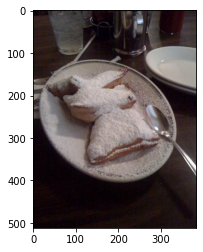

In [28]:
import matplotlib.pyplot as plt

img = imgs[0].compute()
print(img.shape)
plt.imshow(img)

(512, 384, 3)


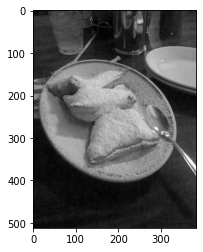

In [32]:
img_g = imgs[0, :, :, 0]
print(img.shape)
plt.imshow(img_g, cmap='gray')

In [34]:
from dask_image.ndinterp import affine_transform
import numpy as np

In [ ]:
reflection_matrix = np.array([[1, 0, 0],
                              [0, -1, image.shape[1]-1],
                              [0, 0, 1]])

## Лабораторная работа 8

__При решении данных задач не подразумевается использования циклов или генераторов Python в ходе работы с пакетами `numpy`, `pandas` и `dask`, если в задании не сказано обратного. Решения задач, в которых для обработки массивов `numpy`, структур `pandas` или структур `dask` используются явные циклы (без согласования с преподавателем), могут быть признаны некорректными и не засчитаны.__

В ходе выполнения все операции вычислений (расчет средних значений, расчет косинусной близости и т.д.) проводятся над `dask.array` и средствами пакета `dask` (и `dask_image`), если в задании не сказано обратного. Переход от `dask.array` к `numpy.array` или `pd.DataFrame` возможен исключительно для демонстрации результата в конце решения задачи. Если в задаче используются результаты выполнения предыдущих задач, то подразумевается, что вы используете результаты в виде `dask.array` (то есть то, что было получено до вызова `compute`, а не после).

<p class="task" id="1"></p>

1\. Сингулярным разложением (SVD) матрицы $A$ размера $M\times N$ называется разложение вида $A = USV^\top$, где $U$ - матрица размера $M\times N$  ортонормированных собственных векторов произведения $AA^\top$, $V^T$ - транспонированная матрица размера $N\times N$ ортонормированных собственных  векторов произведения $A^\top A$, $S$ - диагональная матрица сингулярных значений размера $N\times N$.

SVD может быть использовано для понижения размерности векторов. Для этого от матрицы $U$ оставляют первые $k$ столбцов $U_{\cdot,:k}$, от матрицы $S$ оставляют левый верхний квадрат размера $k\times k$ $S_{:k,:k}$ и вычисляется произведение $\hat{A} = U_{\cdot,:k}S_{:k,:k}$

Выберите эмбеддинги тех рецептов, которые относятся к группе с номеров 3 (файл `recipe_embeddings.h5`), и уменьшите их размерность до 64 при помощи реализации алгоритма SVD из пакета `dask.array.linalg`. Выведите количество строк и столбцов полученного массива.

Примечание: после отбора рецепта, принадлежащих третьей группе, вызовите у полученного массива метод `compute_chunk_sizes`, чтобы `dask` обновил метаинформацию в этом массиве. 

In [1]:
import h5py
import dask.array as da
import dask.array.linalg as dal

f = h5py.File('recipe_embeddings.h5')

mask = f['mask'][:]
embeddings = f['embeddings']

# выбираем эмбеддинги только для рецептов из группы 3
embeddings_group_3 = da.from_array(embeddings[mask == 3])

# уменьшаем размерность до 64 при помощи SVD
u, s, vt = dal.svd_compressed(embeddings_group_3, 64)

# вызываем метод compute_chunk_sizes, чтобы обновить метаинформацию массива
u.compute_chunk_sizes()
s.compute_chunk_sizes()
vt.compute_chunk_sizes()

# выводим размерность полученного массива
print(f"Размерность полученного массива: {u.shape[0]} на {u.shape[1]}")

Размерность полученного массива: 10000 на 64


<p class="task" id="2"></p>

2\. Используя эмбеддинги уменьшенной размерности, полученные в задании 1, посчитайте косинусное сходство между каждой парой рецептов третьей группы. Выведите матрицу косинусного сходства на экран.

In [14]:
# Вычисление косинусного сходства между рецептами
norms = dal.norm(u, axis=1)
u_norm = u / norms[:, None]
cos_similarity = da.dot(u_norm, u_norm.T)

# Вывод матрицы косинусного сходства на экран
print(cos_similarity.compute())

[[ 1.          0.02246167 -0.28616135 ... -0.11177317 -0.14571345
  -0.32620341]
 [ 0.02246167  1.         -0.03562175 ... -0.00822416 -0.08242509
  -0.11519373]
 [-0.28616135 -0.03562175  1.         ...  0.03282374 -0.08275577
   0.12671852]
 ...
 [-0.11177317 -0.00822416  0.03282374 ...  1.          0.1291927
   0.07711199]
 [-0.14571345 -0.08242509 -0.08275577 ...  0.1291927   1.
   0.32537249]
 [-0.32620341 -0.11519373  0.12671852 ...  0.07711199  0.32537249
   1.        ]]


<p class="task" id="3"></p>

3\. Используя результат задания 2, посчитайте и выведите на экран количество рецептов, для которых рецепт с индексом `242` входит число топ-5 ближайших рецептов в смысле косинусной близости. При поиске топ-5 рецептов для конкретного рецепта считайте, что он сам в это число не входит.

In [22]:
import numpy as np

# Выбор строки матрицы косинусного сходства, соответствующей рецепту с индексом 242
cos_similarity_242 = cos_similarity[242, :]

# Получение индексов топ-5 ближайших рецептов
top_5_indexes = np.argsort(cos_similarity_242)[-6:-1] # исключаем сам рецепт с индексом 242

# Проверка, входит ли рецепт с индексом 242 в топ-5 ближайших рецептов
if 242 in top_5_indexes:
    print("Рецепт с индексом 242 входит в топ-5 ближайших рецептов")
else:
    print("Рецепт с индексом 242 не входит в топ-5 ближайших рецептов")
    
print(top_5_indexes)

Рецепт с индексом 242 не входит в топ-5 ближайших рецептов
[   9 1665 4153 2241 4062]


<p class="task" id="4"></p>

4\. Графом называется совокупность двух множеств $G=(V,E)$: множества $V=\{v_1, ..., v_M\}$ узлов и множества ребер $E=\{(v_i, v_j)|v_i\in V, v_j\in V\}$, соединяющих эти узлы. Матрицей смежности невзвешенного графа называется квадратная матрица $A=[a_{ij}]$, в которой ${a_{ij}}$ обозначает количество ребер, соединяющих вершины $i$ и $j$.

Постройте матрицу смежности для графа рецептов на основе матрицы косинусного сходства между каждой парой рецептов. Будем считать, что между двумя рецептами в этом графе существует ребро, если косинусное сходство между двумя этими рецептами не менее 0.85. Петли (ребра из вершины в саму в себя) в графе должны отсутствовать. Посчитайте и выведите на экран количество ребер в данном графе. Проверьте, является ли полученная матрица смежности симметричной.

Примечание: считайте, что два различных рецепта не могут иметь косинусное сходство, равное 1.

<p class="task" id="5"></p>

5\. В файле `authors_info.hdf5` хранятся два датасета, содержащие информацию возрасте человека и количестве рецептов, оставленных этим человеком. Построите тепловую карту, где по горизонтальной оси откладываются значения количества рецептов, по вертикальной оси - значения количества лет, а на пересечении строк и столбцов указано количество раз, когда человек данного возраста оставил данное кол-во рецептов.

Подсказка: для подсчета количества каждой пары вы можете использовать функцию `da.bincount`. Эта функция не может работать с двумерными массивами, но вы можете закодировать каждую пару уникальным целым числом, например при помощи [этой функции](https://en.wikipedia.org/wiki/Pairing_function#Cantor_pairing_function).

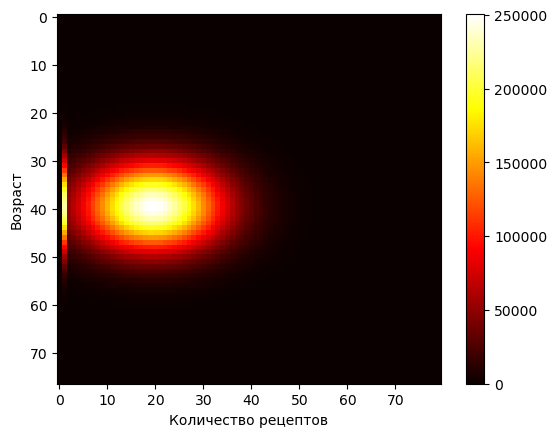

In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# открываем файл
with h5py.File('authors_info.hdf5', 'r') as f:
    age = f['age'][:]
    num_recipes = f['num_recipes'][:]

# определяем максимальные значения возраста и количества рецептов
max_age = age.max()
max_num_recipes = num_recipes.max()

# закодируем каждую пару уникальным целым числом
pairing_func = lambda x, y: (x + y) * (x + y + 1) // 2 + y

# создаем массив для подсчета количества каждой пары
counts = np.zeros((max_age + 1, max_num_recipes + 1))
for i in range(len(age)):
    x = age[i]
    y = num_recipes[i]
    counts[x, y] += 1

# строим тепловую карту
plt.imshow(counts, cmap='hot')
plt.xlabel('Количество рецептов')
plt.ylabel('Возраст')
plt.colorbar()
plt.show()

Самое детализированное фото черной дыры до изобретения телескопа Джеймса-Уэбба

<p class="task" id="6"></p>

6\. В архиве `food` находятся фотографии блюд. Удалите все изображения кроме тех, которые имеют размер 512x512. Загрузите изображения в виде массива `dask.array` при помощи пакета `dask_image`. Выведите на экран основную информацию о полученном массиве. Вычислите среднюю интенсивность трех цветов для каждого пикселя каждого изображения. Полученный трехмерный массив далее интерпретируйте как черно-белые изображения. Визуализируйте одно полученное изображение в черно-белой палитре.

In [1]:
import os
import dask.array as da
import dask_image.imread
import numpy as np
from PIL import Image
from dask_image.imread import imread

start = r'food'
folders = os.listdir(start)
paths = [start + '/' + i for i in folders]

images = []

for i in paths:
    for filename in os.listdir(i):
        file_path = os.path.join(i, filename)
        with Image.open(file_path) as img:
            width, height = img.size
        if width == height == 512:
            images.append(imread(file_path).reshape(512,512,3))

#images
image_array = da.from_array(images)
image_array

dask.array<array, shape=(1735, 512, 512, 3), dtype=uint8, chunksize=(355, 355, 355, 3), chunktype=numpy.ndarray>

In [2]:
gray_array = image_array.mean(axis=-1)
gray_array

dask.array<mean_agg-aggregate, shape=(1735, 512, 512), dtype=float64, chunksize=(355, 355, 355), chunktype=numpy.ndarray>

(512, 512)


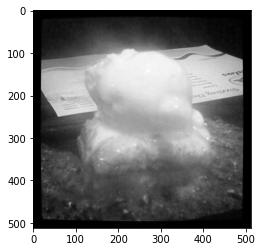

In [3]:
import matplotlib.pyplot as plt

img = gray_array[1].compute()
print(img.shape)
plt.imshow(img, cmap='gray')

<p class="task" id="7"></p>

7\. Добавьте на изображения шум. Для этого сгенерируйте массив, состоящий из нулей и единиц, в котором доля нулей составляет 15%. Выведите на экран среднее значение сгенерированного массива.

Поэлементно умножьте этот массив на каждое черно-белое изображение. На одном рисунке визуализируйте изображение до и после добавления шума. Постройте гистограммы интенсивности пикселей до и после добавления шума.

Среднее значение массива шума: 0.14998088254021635


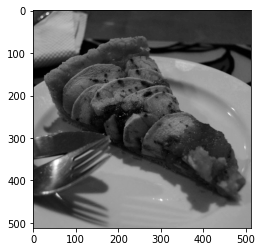

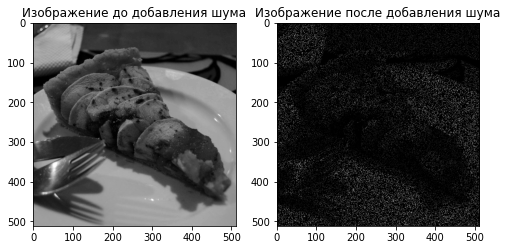

In [ ]:
import numpy as np
import dask.array as da
import matplotlib.pyplot as plt

#Загрузим изображения и выведем на экран одно из них:

plt.imshow(gray_array[0], cmap='gray')

#Сгенерируем массив шума:

noise_ratio = 0.15
noise_array = np.random.choice([0, 1], size=gray_array.shape, p=[1-noise_ratio, noise_ratio])
print("Среднее значение массива шума:", np.mean(noise_array))

#Умножим каждое изображение на массив шума:

noisy_gray_array = gray_array * noise_array

#Визуализируем одно изображение до и после добавления шума:

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(gray_array[0], cmap='gray')
axs[0].set_title('Изображение до добавления шума')
axs[1].imshow(noisy_gray_array[0], cmap='gray')
axs[1].set_title('Изображение после добавления шума')
plt.show()

#Построим гистограммы интенсивности пикселей до и после добавления шума:

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].hist(gray_array[0].flatten(), bins=256)
axs[0].set_title('Гистограмма до добавления шума')
axs[1].hist(noisy_gray_array[0].flatten(), bins=256)
axs[1].set_title('Гистограмма после добавления шума')
plt.show()

Код бесконечно долго выполняется. Гистограммы не рисуются

<p class="task" id="8"></p>

8\. Примените фильтр Гаусса из пакета `dask_image.ndfilters` к черно-белым изображениям. На одном рисунке визуализируйте изображение до и после применения фильтра. Исследуйте, как влияют значения `sigma` и `truncate` на результат. Проверьте не менее трех комбинаций этих параметров.

Text(0.5, 1.0, 'Фильтр Гаусса с sigma=3 и truncate=3.0')

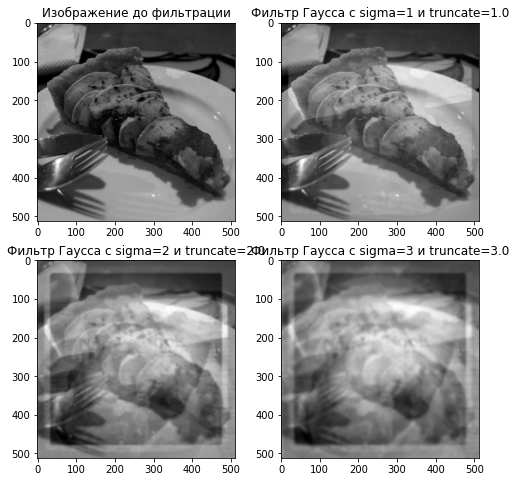

In [4]:
from dask_image.ndfilters import gaussian_filter

# Применяем фильтр Гаусса с sigma=1 и truncate=1.0
filtered_gray_array_1 = gaussian_filter(gray_array, sigma=1, truncate=1.0)

# Применяем фильтр Гаусса с sigma=2 и truncate=2.0
filtered_gray_array_2 = gaussian_filter(gray_array, sigma=2, truncate=2.0)

# Применяем фильтр Гаусса с sigma=3 и truncate=3.0
filtered_gray_array_3 = gaussian_filter(gray_array, sigma=3, truncate=3.0)

# Визуализируем изображение до и после применения фильтра
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs[0, 0].imshow(gray_array[0], cmap='gray')
axs[0, 0].set_title('Изображение до фильтрации')
axs[0, 1].imshow(filtered_gray_array_1[0], cmap='gray')
axs[0, 1].set_title('Фильтр Гаусса с sigma=1 и truncate=1.0')
axs[1, 0].imshow(filtered_gray_array_2[0], cmap='gray')
axs[1, 0].set_title('Фильтр Гаусса с sigma=2 и truncate=2.0')
axs[1, 1].imshow(filtered_gray_array_3[0], cmap='gray')
axs[1, 1].set_title('Фильтр Гаусса с sigma=3 и truncate=3.0')